# FAF.FIA16.1 -- Artificial Intelligence Fundamentals

> **Lab 1: FIA \\
> **Performed by:** Gavirlita Ion, group FAF-191 \\
> **Verified by:** Mihail Gavrilita, asist. univ.





## Imports and Utils

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Task 1 -- Write the following functions using OpenCV. Adjust the parameters and explain your approach. Plot the initial image and the blurred image in the same plot by using Matplotlib subplots:

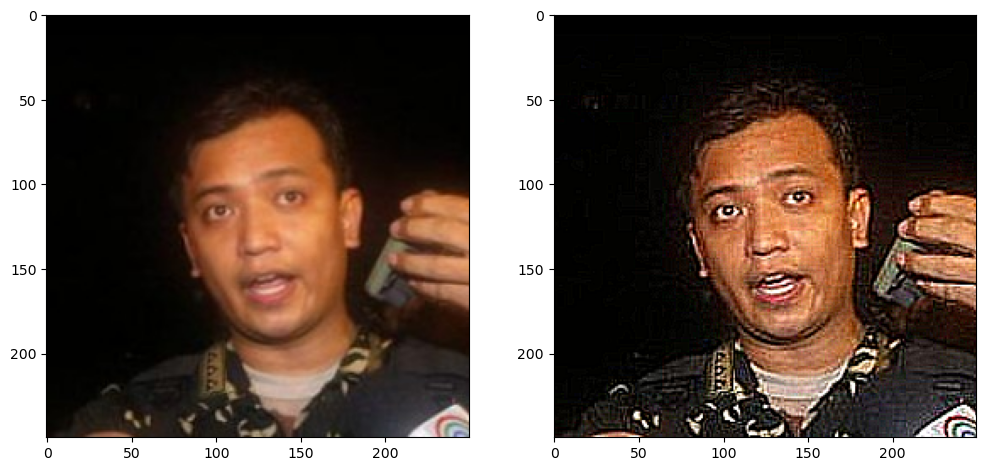

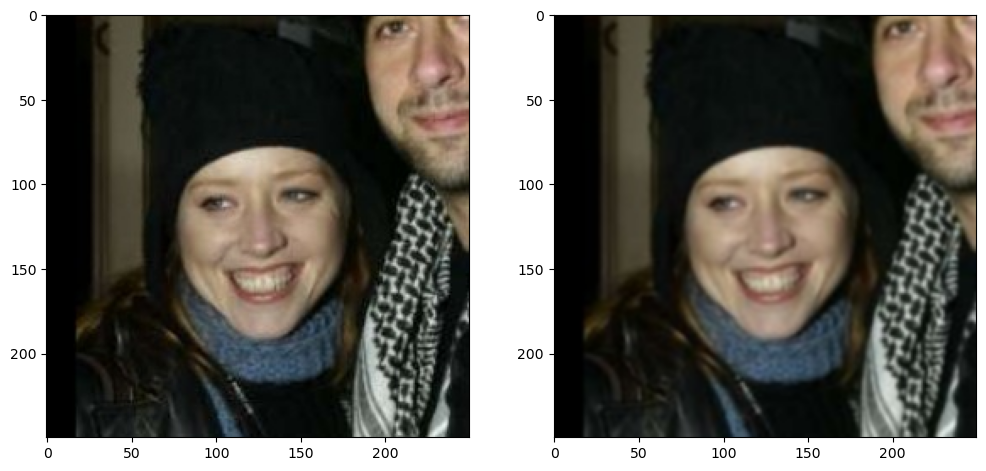

In [6]:
def sharpen_image(image):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    # laplacian" filter (8 -neighnors). It enhances the edges, corners etc. high frequency regions.
    sharpened = cv2.filter2D(image, -1, kernel)
    return sharpened


def blur_image(image, kernel_size=(3, 3)):
    blurred = cv2.GaussianBlur(image, kernel_size, 0)
    return blurred


image= cv2.imread('/home/vanya/Documents/FIA/lab4/test_images/4AE284.jpg')
sharpened = sharpen_image(image)

image2 = cv2.imread('/home/vanya/Documents/FIA/lab4/test_images/53DEBB.jpg')
blurred = blur_image(image2)



fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))

fig2, ax2 = plt.subplots(1, 2, figsize=(12, 6))
ax2[0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
ax2[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))


## Task 2 -- Implement a face detection system using OpenCV. The function should take as input one image and output the result as the coordinates of the face, in case the image contains a face, or None if the image does not contain any faces. Assume that the image contains no more than one face.:

In [8]:
def detect_face(image):
    # Load the pre-trained face detection classifier
    face_cascade = cv2.CascadeClassifier(
        cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Check if a face is detected
    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        return x, y, x + w, y + h
    else:
        return None

face = detect_face(image2)
print(face)
# applyies hharcascade in order to find faces

(65, 65, 185, 185)


## Task 3 -- Task 3 Implement a system that detects if a photo is accepted for passport or not, by using OpenCV. You can be creative in determining the optimal strategy, but the system should at least follow the listed requirements.

In [ ]:
def pasport_check(image):
    # Check if the image is colored
    if len(image.shape) < 3 or image.shape[2] < 3:
        return False

    # Check if the image is in portrait or square orientation
    (height, width, _) = image.shape
    if height > width:
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        (height, width, _) = image.shape
    if height != width:
        return False

    # Detect the eyes in the image
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(eyes) != 2:
        return False

    # Check if the eyes are at the same level
    (eye1_x, eye1_y, eye1_w, eye1_h) = eyes[0]
    (eye2_x, eye2_y, eye2_w, eye2_h) = eyes[1]
    eye1_center = eye1_y + (eye1_h / 2)
    eye2_center = eye2_y + (eye2_h / 2)
    if abs(eye1_center - eye2_center) > 5:
        return False

    # Check if the photo contains only one person
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    if len(faces) != 1:
        return False

    # Check if the head of the person represents 20% to 50% of the area of the photo
    (x, y, w, h) = faces[0]
    face_area = w * h
    image_area = width * height
    if face_area < (0.2 * image_area) or face_area > (0.5 * image_area):
        return False

    return True


print(pasport_check(image))

## Conclusions:

my head hurts

## Bibliography:

https://www.askpython.com/python/examples/clean-csv-data-python

https://realpython.com/python-data-cleaning-numpy-pandas/

https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/#:~:text=of%20Unsupervised%20ML.-,Understanding%20Linear%20Regression,the%20dependent%20and%20independent%20variable.


https://realpython.com/linear-regression-in-python/#simple-linear-regression